In [30]:
import numpy as np
from datascience import *
from datetime import date
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
default_dpi = plots.rcParamsDefault['figure.dpi']

In [40]:
example = Table().with_columns([
    "x", [0, 1, 2, 3, 4, 5],
    "y", [0, 1, 2, 3, 4, 5],
    "y2", [0, 2, 4, 6, 8, 10],
    "-y", [0, -1, -2, -3, -4, -5],
    "-y2", [0, -2, -4, -6, -8, -10],
    "y0", [0, 0, 0, 0, 0, 0]

])
example

x,y,y2,-y,-y2,y0
0,0,0,0,0,0
1,1,2,-1,-2,0
2,2,4,-2,-4,0
3,3,6,-3,-6,0
4,4,8,-4,-8,0
5,5,10,-5,-10,0


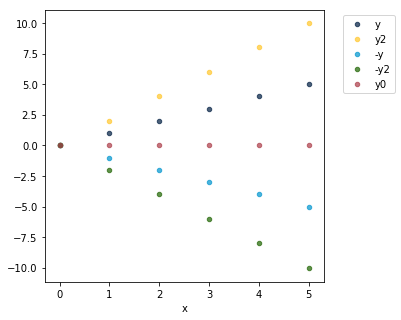

In [41]:
example.scatter("x")

In [43]:
def standard_units(nums):
    return (nums - np.mean(nums)) / np.std(nums)

example_standard = example.with_columns([
    "x (standard units)", standard_units(example.column("x")),
    "y (standard units)", standard_units(example.column("y")),
    "y2 (standard units)", standard_units(example.column("y2")),
    "-y (standard units)", standard_units(example.column("-y")),
    "-y2 (standard units)", standard_units(example.column("-y2")),
    "y0 (standard units)", standard_units(example.column("y0"))


])
example_standard

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


x,y,y2,-y,-y2,y0,x (standard units),y (standard units),y2 (standard units),-y (standard units),-y2 (standard units),y0 (standard units)
0,0,0,0,0,0,-1.46385,-1.46385,-1.46385,1.46385,1.46385,nan
1,1,2,-1,-2,0,-0.87831,-0.87831,-0.87831,0.87831,0.87831,nan
2,2,4,-2,-4,0,-0.29277,-0.29277,-0.29277,0.29277,0.29277,nan
3,3,6,-3,-6,0,0.29277,0.29277,0.29277,-0.29277,-0.29277,nan
4,4,8,-4,-8,0,0.87831,0.87831,0.87831,-0.87831,-0.87831,nan
5,5,10,-5,-10,0,1.46385,1.46385,1.46385,-1.46385,-1.46385,nan


In [34]:
example_standard_with_products = example_standard.with_columns([
    "x * y", example_standard.column("x (standard units)") * example_standard.column("y (standard units)"),
    "x * y2", example_standard.column("x (standard units)") * example_standard.column("y2 (standard units)"),
    "x * -y", example_standard.column("x (standard units)") * example_standard.column("-y (standard units)"),
    "x * -y2", example_standard.column("x (standard units)") * example_standard.column("-y2 (standard units)")
    
])
example_standard_with_products

x,y,y2,-y,-y2,x (standard units),y (standard units),y2 (standard units),-y (standard units),-y2 (standard units),x * y,x * y2,x * -y,x * -y2
0,0,0,0,0,-1.46385,-1.46385,-1.46385,1.46385,1.46385,2.14286,2.14286,-2.14286,-2.14286
1,1,2,-1,-2,-0.87831,-0.87831,-0.87831,0.87831,0.87831,0.771429,0.771429,-0.771429,-0.771429
2,2,4,-2,-4,-0.29277,-0.29277,-0.29277,0.29277,0.29277,0.0857143,0.0857143,-0.0857143,-0.0857143
3,3,6,-3,-6,0.29277,0.29277,0.29277,-0.29277,-0.29277,0.0857143,0.0857143,-0.0857143,-0.0857143
4,4,8,-4,-8,0.87831,0.87831,0.87831,-0.87831,-0.87831,0.771429,0.771429,-0.771429,-0.771429
5,5,10,-5,-10,1.46385,1.46385,1.46385,-1.46385,-1.46385,2.14286,2.14286,-2.14286,-2.14286


In [35]:
r_x_y = np.average(example_standard_with_products.column("x * y"))
r_x_y

1.0

In [36]:
r_x_y2 = np.average(example_standard_with_products.column("x * y2"))
r_x_y2

1.0

In [37]:
r_x_neg_y = np.average(example_standard_with_products.column("x * -y"))
r_x_neg_y

-1.0

In [38]:
r_x_neg_y2 = np.average(example_standard_with_products.column("x * -y2"))
r_x_neg_y2

-1.0

The correlation coefficient measures how close the data is to a straight line.  It doesn't matter which straight line, because with standard units, every straight line with a positive slope turns into `y = x`, and every straight line with a negative slope turns into `y = -x`.  (For a slope of 0, apparently it's undefined.)